<a target="_blank" href="https://colab.research.google.com/github/NolanRink/CS4520Project2">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, expon

def load_spike_data(file_path):
    return np.loadtxt(file_path)

def convert_to_time(spike_indices, sampling_rate=20000):
    dt = 1.0 / sampling_rate
    return spike_indices * dt

def compute_spike_counts(spike_times, window_size):
    T = spike_times[-1]
    num_windows = int(np.ceil(T / window_size))
    counts = np.zeros(num_windows)
    window_edges = np.linspace(0, T, num_windows + 1)
    for i in range(num_windows):
        counts[i] = np.sum((spike_times >= window_edges[i]) & (spike_times < window_edges[i+1]))
    return counts

def compute_isi(spike_times):
    return np.diff(spike_times)


In [2]:
all_file_paths = ['ec012\\ec012ec.187.res.1', 
                  'ec012\\ec012ec.187.res.2', 
                  'ec012\\ec012ec.228.res.1', 
                  'ec012\\ec012ec.228.res.2', 
                  'ec012\\ec012ec.375.res.1', 
                  'ec012\\ec012ec.375.res.2', 
                  'ec016\\ec016.272.res.1', 
                  'ec016\\ec016.272.res.2', 
                  'ec016\\ec016.457.res.1', 
                  'ec016\\ec016.457.res.2', 
                  'ec016\\ec016.674.res.1', 
                  'ec016\\ec016.674.res.2', 
                  'ec016\\ec016.682.res.1', 
                  'ec016\\ec016.682.res.2']

In [3]:
#Choose files and window sizes to use
chosen_file = []
chosen_file.append(all_file_paths[3])
chosen_file.append(all_file_paths[4])
chosen_file.append(all_file_paths[6])

window_sizes = [0.01, 0.05, 0.1]

------------------------------------------------------------
window_size: 0.01
------------------------------------------------------------
Analyzing file: ec012\ec012ec.228.res.2
Total spikes: 85738
Duration (s): 1109.19
Poisson λ: 0.773
Fano factor: 0.887


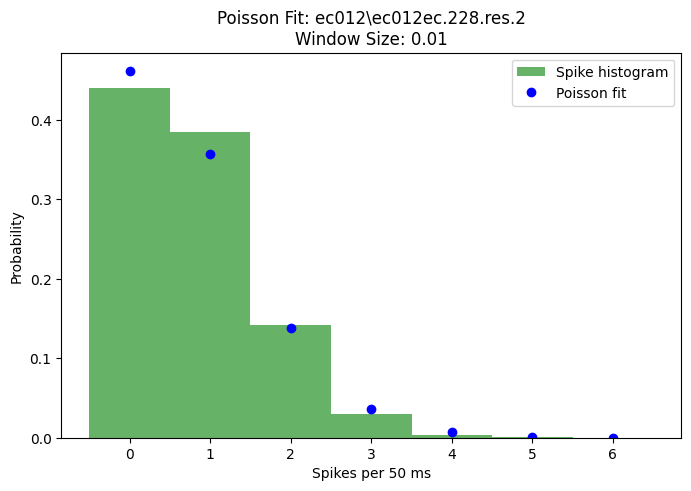

Mean ISI (s): 0.012937
Exponential λ: 77.299


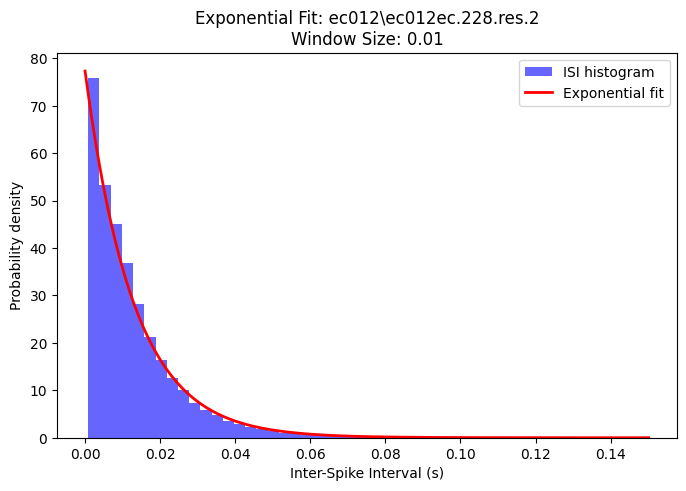

------------------------------------------------------------

------------------------------------------------------------
window_size: 0.05
------------------------------------------------------------
Analyzing file: ec012\ec012ec.228.res.2
Total spikes: 85738
Duration (s): 1109.19
Poisson λ: 3.865
Fano factor: 1.018


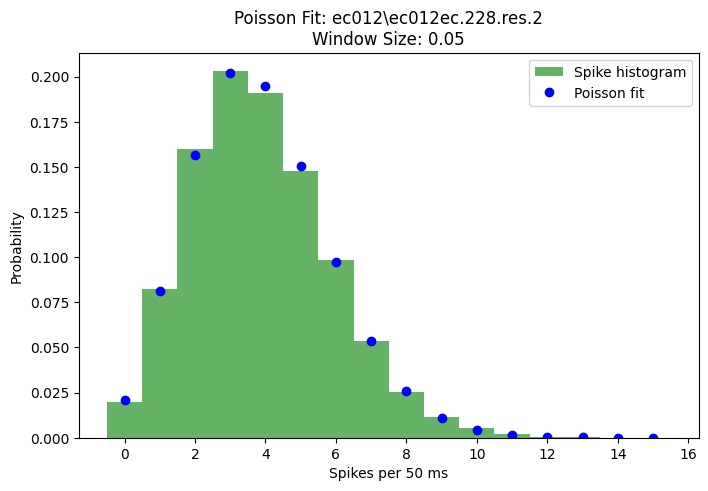

Mean ISI (s): 0.012937
Exponential λ: 77.299


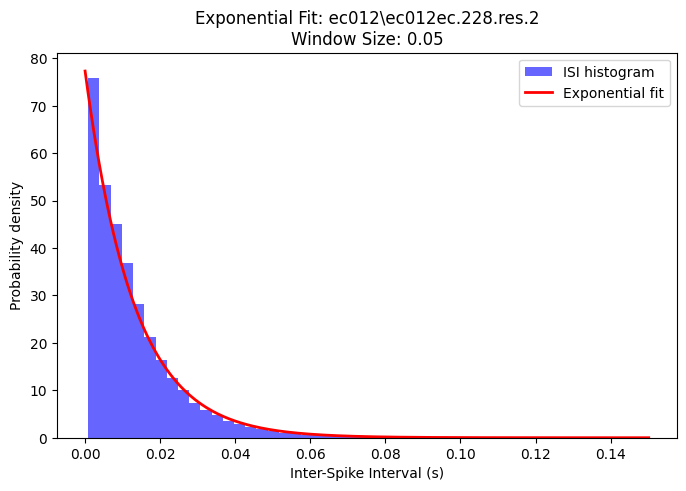

------------------------------------------------------------

------------------------------------------------------------
window_size: 0.1
------------------------------------------------------------
Analyzing file: ec012\ec012ec.228.res.2
Total spikes: 85738
Duration (s): 1109.19
Poisson λ: 7.730
Fano factor: 1.286


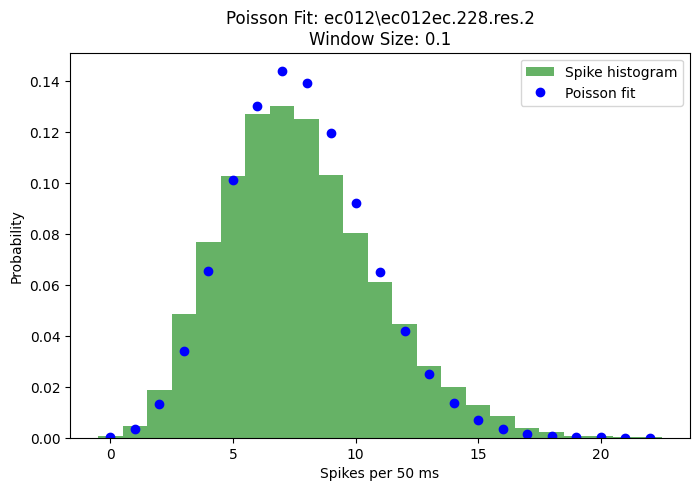

Mean ISI (s): 0.012937
Exponential λ: 77.299


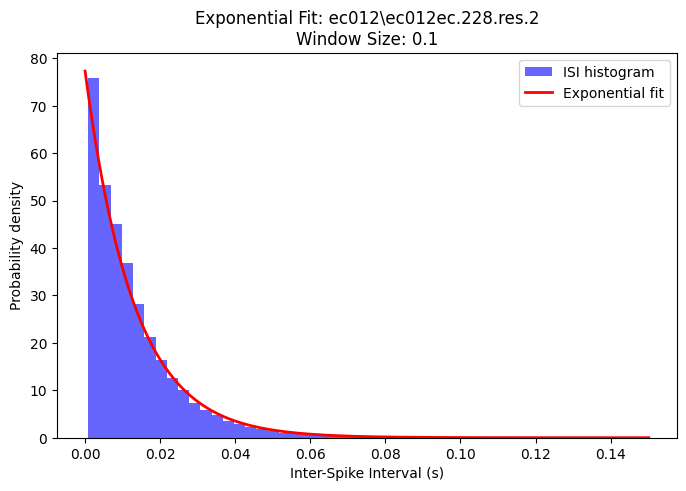

------------------------------------------------------------

------------------------------------------------------------
window_size: 0.01
------------------------------------------------------------
Analyzing file: ec012\ec012ec.375.res.1
Total spikes: 77870
Duration (s): 631.19
Poisson λ: 1.234
Fano factor: 0.978


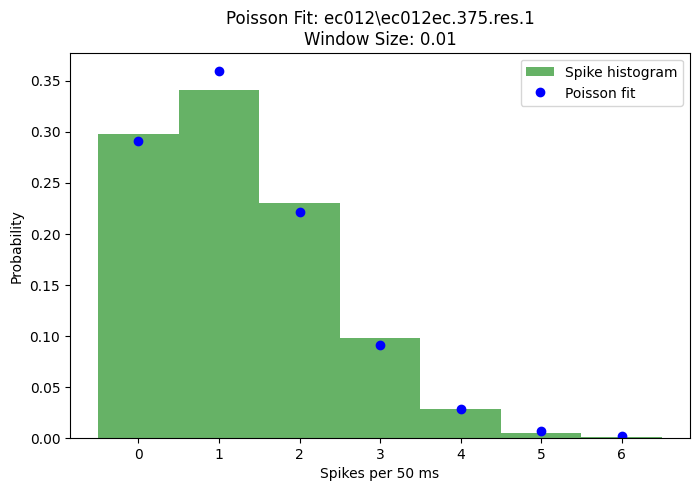

Mean ISI (s): 0.008106
Exponential λ: 123.369


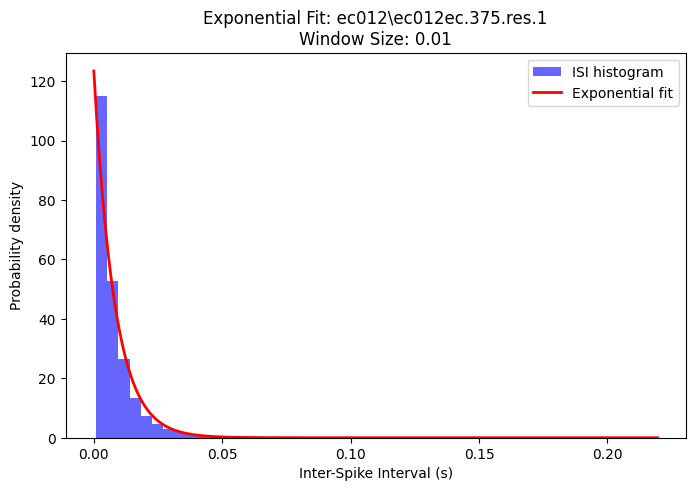

------------------------------------------------------------

------------------------------------------------------------
window_size: 0.05
------------------------------------------------------------
Analyzing file: ec012\ec012ec.375.res.1
Total spikes: 77870
Duration (s): 631.19
Poisson λ: 6.168
Fano factor: 1.751


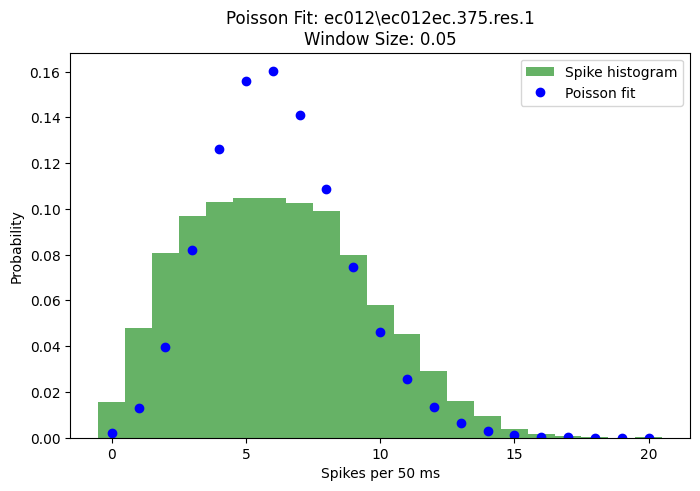

Mean ISI (s): 0.008106
Exponential λ: 123.369


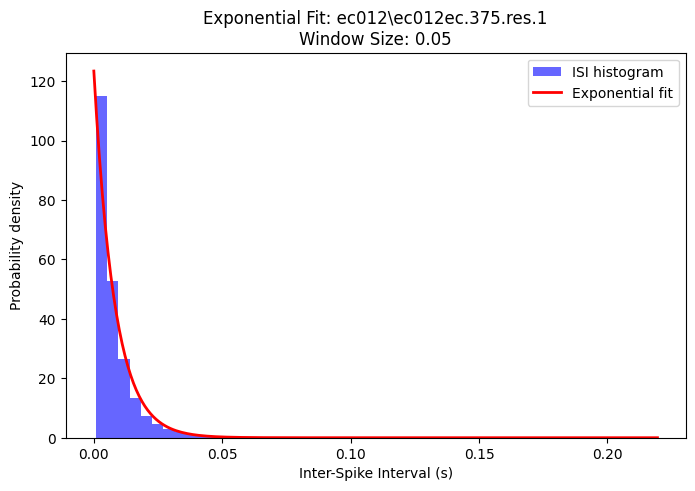

------------------------------------------------------------

------------------------------------------------------------
window_size: 0.1
------------------------------------------------------------
Analyzing file: ec012\ec012ec.375.res.1
Total spikes: 77870
Duration (s): 631.19
Poisson λ: 12.337
Fano factor: 2.702


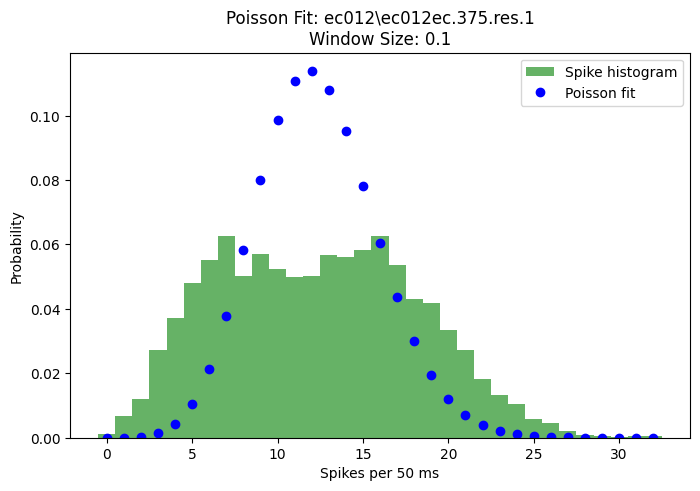

Mean ISI (s): 0.008106
Exponential λ: 123.369


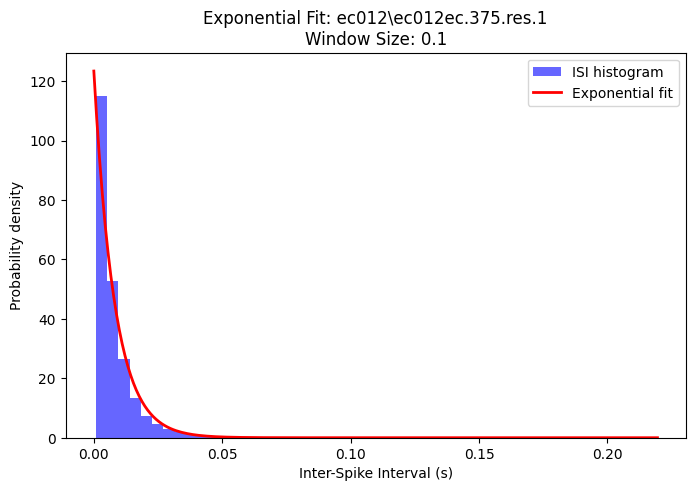

------------------------------------------------------------

------------------------------------------------------------
window_size: 0.01
------------------------------------------------------------
Analyzing file: ec016\ec016.272.res.1
Total spikes: 247744
Duration (s): 1638.67
Poisson λ: 1.512
Fano factor: 2.127


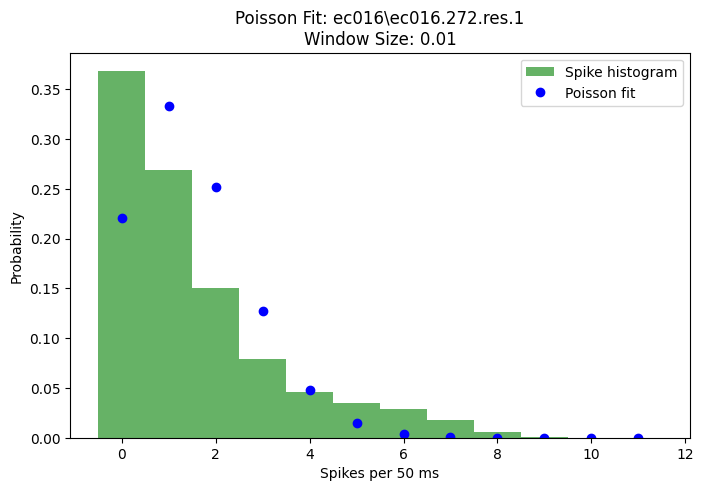

Mean ISI (s): 0.006614
Exponential λ: 151.187


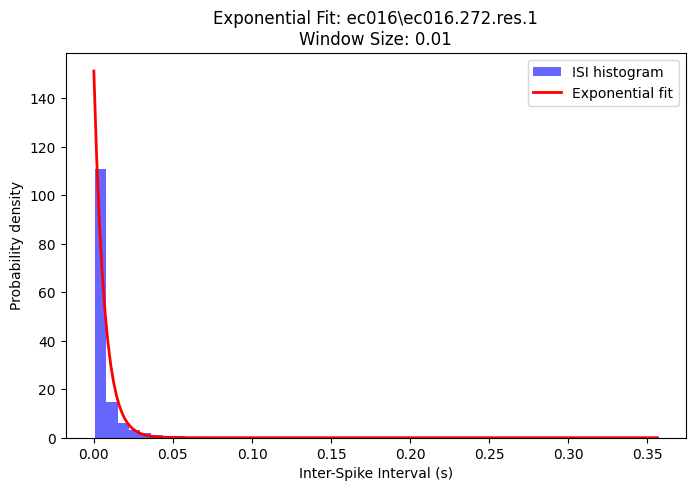

------------------------------------------------------------

------------------------------------------------------------
window_size: 0.05
------------------------------------------------------------
Analyzing file: ec016\ec016.272.res.1
Total spikes: 247744
Duration (s): 1638.67
Poisson λ: 7.559
Fano factor: 6.400


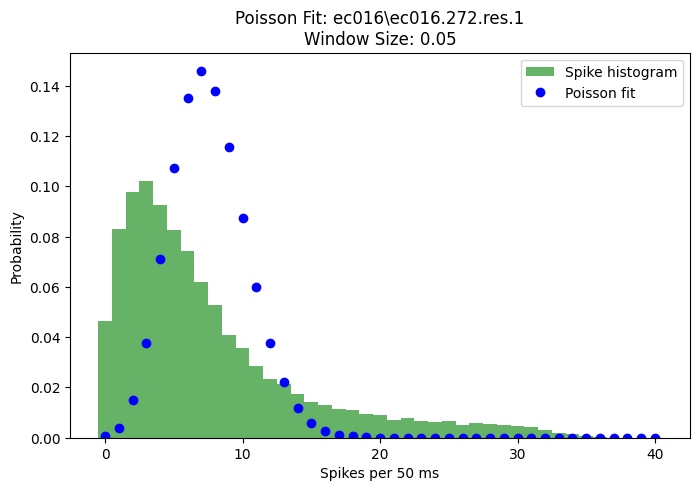

Mean ISI (s): 0.006614
Exponential λ: 151.187


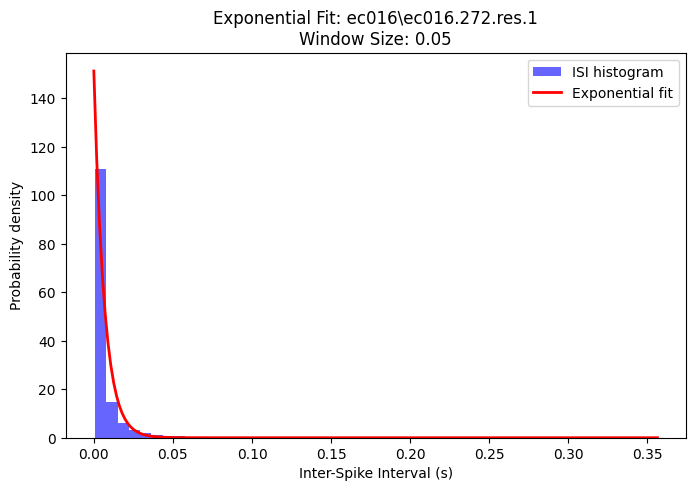

------------------------------------------------------------

------------------------------------------------------------
window_size: 0.1
------------------------------------------------------------
Analyzing file: ec016\ec016.272.res.1
Total spikes: 247744
Duration (s): 1638.67
Poisson λ: 15.118
Fano factor: 8.656


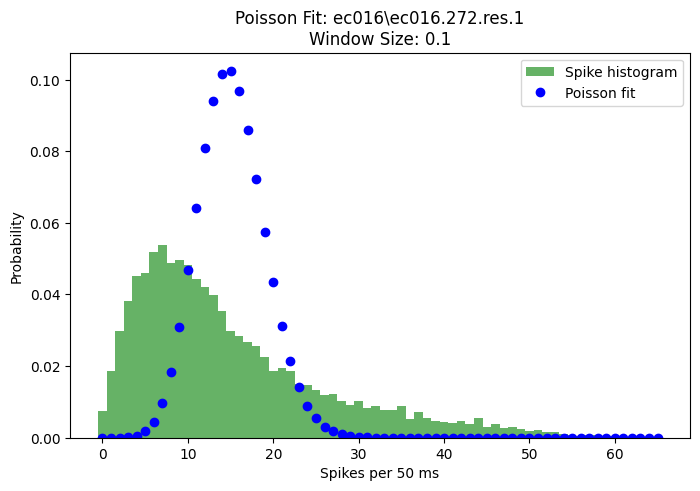

Mean ISI (s): 0.006614
Exponential λ: 151.187


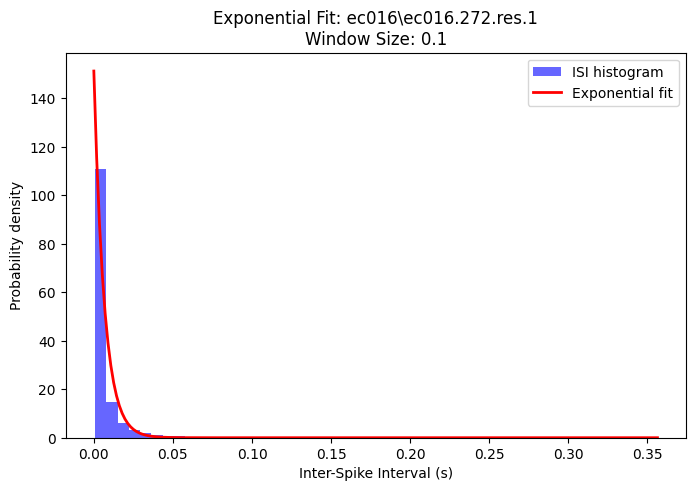

------------------------------------------------------------



In [4]:
for selected_file in chosen_file:
    for window_size in window_sizes:
        print("------------------------------------------------------------")
        print(f"window_size: {window_size}")
        print("------------------------------------------------------------")
        print(f"Analyzing file: {selected_file}")
        
        spike_indices = load_spike_data(selected_file)
        spike_times = convert_to_time(spike_indices)
        
        print(f"Total spikes: {len(spike_times)}")
        print(f"Duration (s): {spike_times[-1]:.2f}")
        
        # Poisson Fit
        
        counts = compute_spike_counts(spike_times, window_size)
        lambda_est = np.mean(counts)
        fano_factor = np.var(counts) / lambda_est if lambda_est > 0 else np.nan
        
        print(f"Poisson λ: {lambda_est:.3f}")
        print(f"Fano factor: {fano_factor:.3f}")
        
        plt.figure(figsize=(8, 5))
        bins = np.arange(np.min(counts), np.max(counts) + 2) - 0.5
        plt.hist(counts, bins=bins, density=True, alpha=0.6, color='g', label='Spike histogram')
        x_vals = np.arange(int(np.min(counts)), int(np.max(counts)) + 1)
        plt.plot(x_vals, poisson.pmf(x_vals, lambda_est), 'bo', label='Poisson fit')
        plt.xlabel('Spikes per 50 ms')
        plt.ylabel('Probability')
        plt.title(f'Poisson Fit: {selected_file}\nWindow Size: {window_size}')
        plt.legend()
        plt.show()
        
        # Exponential Fit
        isi = compute_isi(spike_times)
        mean_isi = np.mean(isi)
        lambda_isi_est = 1.0 / mean_isi if mean_isi > 0 else np.nan
        
        print(f"Mean ISI (s): {mean_isi:.6f}")
        print(f"Exponential λ: {lambda_isi_est:.3f}")
        
        plt.figure(figsize=(8, 5))
        plt.hist(isi, bins=50, density=True, alpha=0.6, color='b', label='ISI histogram')
        if not np.isnan(lambda_isi_est):
            x_pdf = np.linspace(0, np.max(isi), 200)
            plt.plot(x_pdf, lambda_isi_est * np.exp(-lambda_isi_est * x_pdf), 'r-', lw=2, label='Exponential fit')
        plt.xlabel('Inter-Spike Interval (s)')
        plt.ylabel('Probability density')
        plt.title(f'Exponential Fit: {selected_file}\nWindow Size: {window_size}')
        plt.legend()
        plt.show()

        print("------------------------------------------------------------\n")


In this analysis, we see that the maximum likelihood estimators (MLEs) for the Poisson and exponential distributions rely on simple statistics of the data. For the Poisson distribution, we divide the spike train into equal windows, count the spikes in each window, and take the average count. This average is the MLE for the Poisson rate (λ). For the exponential distribution, we compute inter-spike intervals (ISIs) by subtracting consecutive spike times, find the average ISI, and then take its reciprocal to get the MLE for the exponential rate. Comparing the fitted curves to the observed histograms confirms that the MLE for the Poisson distribution is the sample mean of the counts, while the MLE for the exponential distribution is one over the sample mean of the ISIs. This shows that fitting these distributions by MLE is essentially the same as using these simple sample statistics.

When changing the time window size, the estimated Poisson rate λ changes in a predictable way. With smaller bins, the average number of spikes per bin is smaller, so λ is lower. With larger bins, I get more spikes per bin, and thus a larger λ. The Fano factor, which is the ratio of variance to mean in the spike counts, also tends to increase with larger window sizes. For some datasets, it stays near 1 for small windows but grows above 1 for bigger windows, suggesting that the spiking becomes more bursty or correlated at longer timescales which I think is an indication of overdispersion relative to a perfect Poisson process.

For the exponential distribution fit, I use the inter-spike intervals (ISIs). That fit does not depend on the bin size because it’s based on the average ISI. However, I often find that a single-exponential model does not perfectly match the actual ISI distribution. Real neurons might have a refractory period or other patterns that mean the ISIs are not truly memoryless, which is why an exponential model can be a poor fit even though the math for the maximum-likelihood estimate (1 divided by the mean ISI) is straightforward.